In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import Bio.SeqIO as SeqIO

In [2]:
def calc_aai(seq1, seq2, region = [None, None], gap_rate = 0.8):
    #if len(seq1) != len(seq2):
    #    raise Exception('Sequence not aligned properly!')
    length = len(seq1)
    seq1_array = np.array(list(seq1))[region[0]:region[1]]
    seq2_array = np.array(list(seq2))[region[0]:region[1]]
    
    non_gap_positions = (seq1_array != '-') & (seq2_array != '-')
    match = np.sum(seq1_array[non_gap_positions] == seq2_array[non_gap_positions])
    gap = length - np.count_nonzero(non_gap_positions)
    
    #try:
    #    pident = match / (length - gap) * 100
    #except ZeroDivisionError:
    #    pident = 'NA'
    
    return (length - gap - match)/length

In [3]:
metadata = pd.read_csv('/jdfssz1/ST_HEALTH/P20Z10200N0206/wangdaxi/Projects/SouthChinaBat/Sarbecovirus/01.Sarbecovirus_genome_set/Rhinolophus_final_metatable.csv', header=None, names=['seqid', 'seqheader', 'province', 'species'])
lineage_info = pd.read_table('/jdfssz1/ST_HEALTH/P20Z10200N0206/renzirui/Projects/GIZ_SouthernChinaBat_clean/BatSarbecovirus/order_in_plot_given_ordering.txt', sep='\s+')
lineage_info['Lineage'] = lineage_info['Lineage'].astype(str)
metadata_addlineage = metadata.merge(lineage_info[['Name', 'Lineage']], right_on='Name', left_on='seqid', how='right').drop('Name', axis=1)
metadata_addlineage

,seqid,seqheader,province,species,Lineage
0,OK017807.1,Anhui_R.sinicus_AH2021A[OK017807.1],Anhui,Rhinolophus_sinicus,5
1,OQ297705.1,Chongqing_R.rex_CQ/L80.18/2021[OQ297705.1],Chongqing,Rhinolophus_rex,3
2,OK017808.1,Fujian_R.sinicus_FJ2021A[OK017808.1],Fujian,Rhinolophus_sinicus,5
3,OK017809.1,Fujian_R.sinicus_FJ2021D[OK017809.1],Fujian,Rhinolophus_sinicus,5
4,OK017810.1,Fujian_R.sinicus_FJ2021E[OK017810.1],Fujian,Rhinolophus_sinicus,5
...,...,...,...,...,...
118,OP963575.1,Yunnan_R.thomasi_Bat/2018/S18LSBatR79[OP963575.1],Yunnan,Rhinolophus_thomasi,4
119,OQ503506.1,Yunnan_R.thomasi_RsYN2018[B228][OQ503506.1],Yunnan,Rhinolophus_thomasi,4
120,KF294457.1,Zhejiang_R.monoceros_Longquan-140[KF294457.1],Zhejiang,Rhinolophus_monoceros,5
121,MG772933.1,Zhejiang_R.pusillus_bat-SL-CoVZC45[MG772933.1],Zhejiang,Rhinolophus_pusillus,1


In [4]:
seqdict = SeqIO.to_dict(SeqIO.parse("/jdfssz1/ST_HEALTH/P20Z10200N0206/renzirui/Projects/GIZ_SouthernChinaBat_clean/BatSarbecovirus/bat_sarbecovirus_cdhit_mafft_output_selected_Rhinolophus.clean.rmwronghost.fa", format='fasta'))

In [5]:
seqid_list = list(metadata_addlineage['seqid'])

In [6]:
seqid2lineage = metadata_addlineage.set_index('seqid').to_dict()["Lineage"]
seqid2lineage

{'OK017807.1': '5',
 'OQ297705.1': '3',
 'OK017808.1': '5',
 'OK017809.1': '5',
 'OK017810.1': '5',
 'OK017811.1': '5',
 'OK017792.1': '4',
 'OQ297701.1': '5',
 'OQ297702.1': '5',
 'OQ297703.1': '5',
 'OQ503495.1': '5',
 'DQ022305.2': '5',
 'GQ153539.1': '5',
 'GQ153542.1': '5',
 'GQ153543.1': '5',
 'GQ153545.1': '5',
 'GQ153547.1': '5',
 'HD13589': '5',
 'B68': '5',
 '201924': '5',
 'B50': '5',
 'MW681002.1': '5',
 'CH231': '5',
 'OK017812.1': '5',
 'OK017813.1': '5',
 'CH063': '5',
 'OK017820.1': '5',
 'OK017822.1': '5',
 'OK017823.1': '5',
 'OK017824.1': '5',
 'OK017825.1': '5',
 'OK017827.1': '5',
 'OK017828.1': '5',
 'CH007': '5',
 'B87': '5',
 'B86': '5',
 'DQ071615.1': '4',
 'OK017859.1': '3',
 'FJ588686.1': '4',
 'KJ473815.1': '4',
 'KY770858.1': '4',
 'OQ503497.1': '3',
 'OK017829.1': '4',
 'OK017830.1': '4',
 'OK017831.1': '4',
 'KJ473812.1': '2',
 'KY770860.1': '2',
 'DQ648856.1': '2',
 'DQ412042.1': '2',
 'DQ648857.1': '3',
 'DQ412043.1': '3',
 'KJ473814.1': '3',
 'MZ328294

In [19]:
result = []
for i in range(len(seqid2lineage)):
    for j in range(i+1, len(seqid2lineage)):
        same_lineage = seqid2lineage[seqid_list[i]] == seqid2lineage[seqid_list[j]]
        aai = 1 - calc_aai(seqdict[seqid_list[i]], seqdict[seqid_list[j]])
        result.append([same_lineage, aai])

In [22]:
anidata = pd.DataFrame(result, columns = ['same_lineage', 'identity'])

In [25]:
import scipy.stats as stat
stat.mannwhitneyu(np.array(anidata.loc[anidata['same_lineage'], 'identity']), np.array(anidata.loc[~anidata['same_lineage'], 'identity']))

MannwhitneyuResult(statistic=11183612.5, pvalue=0.0)

<Axes: xlabel='same_lineage', ylabel='identity'>

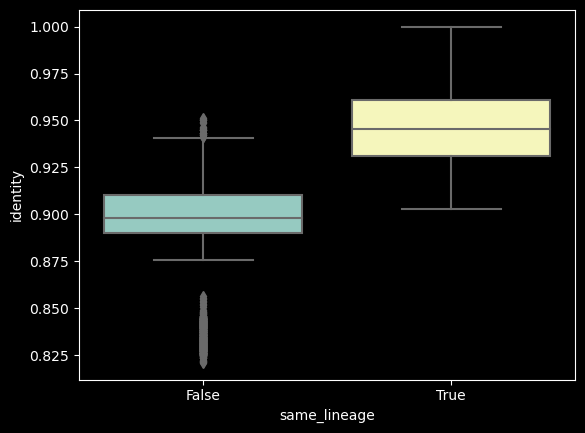

In [27]:
import seaborn as sns
sns.boxplot(x='same_lineage', y='identity', data=anidata)